In [1]:
import sqlite3
import os
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import datetime
import dateutil.parser as dt_parser

In [2]:
os.getcwd()

'/Users/chrischurch/R_Projects/Py_Projects/CryptoBot'

In [3]:
conn = sqlite3.connect('data/PyBot_DB.sqlite')

In [4]:
c = conn.cursor()

In [5]:
test = c.execute('SELECT * FROM arb')

In [6]:
row = test.fetchall()

In [7]:
print(row)

[(u'2018-04-16 17:47:09.192715', 12.083, 0.01040859228546748, 0.004063734410908243, -0.0034516205481873235, -0.05342540888241349, -0.04743589315835317, -0.04058855605917433), (u'2018-04-16 17:48:32.528562', 12.083, 0.010566668801809889, 0.004220818564489915, -0.0022727750978736973, -0.053073407863767526, -0.04708166482909067, -0.041193672075535516), (u'2018-04-16 17:49:58.148113', 12.083, 0.010960177815032876, 0.004611857231707472, -0.0022727750978736973, -0.053863928669952106, -0.0478771877099595, -0.041193672075535516), (u'2018-04-16 17:51:21.198067', 12.083, 0.011080442627545442, 0.0047313670533831705, -0.0022727750978736973, -0.05372407641338579, -0.04773645052863621, -0.040966753569400036), (u'2018-04-16 17:52:41.803525', 12.083, 0.010547697009060115, 0.004201965871661256, -0.00329460208511955, -0.05375726169460492, -0.04776984579200113, -0.04081547456530967), (u'2018-04-16 17:54:04.566679', 12.083, 0.010733651290752459, 0.004386752781320077, -0.003373117499456445, -0.053566446327

In [8]:
schema = c.execute("PRAGMA table_info(arb)").fetchall()

In [9]:
data = c.execute('SELECT * FROM arb ORDER BY time DESC LIMIT 1').fetchall()

In [10]:
data[0]

(u'2018-04-17 19:53:51.258071',
 12.017,
 0.010174974831501095,
 0.028267460366716478,
 -0.013953237593733623,
 -0.05272059044331252,
 -0.06937415542804468,
 -0.030118478407467217)

In [11]:
schema

[(0, u'time', u'datetime', 0, None, 0),
 (1, u'zarusd', u'real', 0, None, 0),
 (2, u'luno_btc_arb', u'real', 0, None, 0),
 (3, u'ice3x_btc_arb', u'real', 0, None, 0),
 (4, u'ice3x_ltc_arb', u'real', 0, None, 0),
 (5, u'luno_btc_revarb', u'real', 0, None, 0),
 (6, u'ice3x_btc_revarb', u'real', 0, None, 0),
 (7, u'ice3x_ltc_revarb', u'real', 0, None, 0)]

In [12]:
data[0][5:]

(-0.05272059044331252, -0.06937415542804468, -0.030118478407467217)

In [16]:
data = c.execute("SELECT * FROM arb WHERE time >= datetime('now','localtime','-1 days')").fetchall()

In [20]:
data = pd.DataFrame(data)

In [21]:
data

,0,1,2,3,4,5,6,7
0,2018-04-16 20:07:44.709641,12.083,0.006798,-0.003364,-0.008916,-0.049446,-0.039746,-0.035823
1,2018-04-16 20:08:17.311306,12.083,0.006165,-0.003991,-0.009459,-0.051007,-0.041323,-0.034008
2,2018-04-16 20:09:07.546470,12.083,0.005929,-0.004225,-0.010157,-0.048796,-0.039090,-0.034008
3,2018-04-16 20:09:40.130362,12.083,0.005929,-0.004225,-0.010467,-0.048796,-0.039090,-0.034008
4,2018-04-16 20:10:29.402055,12.083,0.006737,-0.003425,-0.010234,-0.050736,-0.041049,-0.034008
5,2018-04-16 20:11:11.041666,12.083,0.007192,-0.002974,-0.009847,-0.050545,-0.040857,-0.034008
6,2018-04-16 20:11:45.051119,12.083,0.007435,-0.002734,-0.009692,-0.050554,-0.040866,-0.034008
7,2018-04-16 20:12:19.647202,12.083,0.007349,-0.002819,-0.009615,-0.050228,-0.040536,-0.034008
8,2018-04-16 20:12:52.062902,12.083,0.007479,-0.002691,-0.009459,-0.050228,-0.040536,-0.034008
9,2018-04-16 20:13:31.151026,12.083,0.007349,-0.002819,-0.008994,-0.049985,-0.040291,-0.035445


In [4]:
df = pd.read_sql_query("SELECT * FROM arb WHERE time >= datetime('now','localtime','-1 days')", conn)

In [8]:
df

,time,zarusd,luno_btc_arb,ice3x_btc_arb,ice3x_ltc_arb,luno_btc_revarb,ice3x_btc_revarb,ice3x_ltc_revarb
0,2018-04-17 19:40:53.085109,12.017,0.010885,0.028990,-0.010536,-0.054057,-0.070688,-0.034378
1,2018-04-17 19:42:25.494667,12.017,0.011539,0.029656,-0.009750,-0.054150,-0.070778,-0.034447
2,2018-04-17 19:44:32.411727,12.017,0.010904,0.029009,-0.009750,-0.053652,-0.070289,-0.034028
3,2018-04-17 19:46:34.214085,12.017,0.009906,0.027993,-0.010822,-0.052498,-0.069156,-0.034238
4,2018-04-17 19:49:40.005031,12.017,0.009157,0.027231,-0.013953,-0.051447,-0.068123,-0.030398
5,2018-04-17 19:51:46.529443,12.017,0.010461,0.028558,-0.014308,-0.053249,-0.069894,-0.029560
6,2018-04-17 19:53:51.258071,12.017,0.010175,0.028267,-0.013953,-0.052721,-0.069374,-0.030118
7,2018-04-17 20:56:08.322705,12.017,0.015535,0.031004,0.013236,-0.058634,-0.072745,-0.055673
8,2018-04-17 20:58:07.344969,12.017,0.017121,0.034611,0.015338,-0.059919,-0.075797,-0.057418
9,2018-04-17 21:00:18.250679,12.017,0.013509,0.033144,0.013611,-0.056268,-0.074189,-0.056511


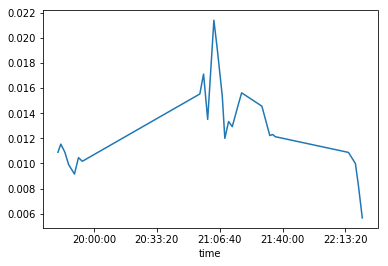

In [15]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].apply(lambda x: datetime.datetime.time(x))

plt.plot(df['time'], df['luno_btc_arb'])